## DFO Si Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pickle
import cmocean

mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('legend', fontsize=12)
mpl.rc('axes', titlesize=12)
mpl.rc('axes', labelsize=12)
mpl.rc('figure', titlesize=12)
mpl.rc('font', size=12)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = ','.join(r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 '''.split()))
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
%matplotlib inline

In [2]:
df=et.loadDFO()
df.head()

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,Chlorophyll_Extracted,Chlorophyll_Extracted_units,N,Si,Silicate_units,AbsSal,ConsT,Z,dtUTC
0,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,12.0,NaN,None,5.28,mg/m^3,6.6,13.6,umol/L,NaN,NaN,12.0,1982-07-16 01:21:00
1,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,21.5,NaN,None,0.61,mg/m^3,21.2,45.0,umol/L,NaN,NaN,21.5,1982-07-16 01:21:00
2,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,30.5,NaN,None,NaN,mg/m^3,23.5,47.4,umol/L,NaN,NaN,30.5,1982-07-16 01:21:00
3,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,52.3,NaN,None,NaN,mg/m^3,28.0,50.2,umol/L,NaN,NaN,52.3,1982-07-16 01:21:00
4,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,75.4,NaN,None,NaN,mg/m^3,26.5,49.1,umol/L,NaN,NaN,75.4,1982-07-16 01:21:00


In [3]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]
    tmask=mesh.variables['tmask'][:,:,:,:]
    gdept=mesh.variables['gdept_1d'][0,:]
    e3t0=mesh.variables['e3t_0'][0,:,:,:]
bathy=np.sum(e3t0,0)
with nc.Dataset('/results/SalishSea/hindcast.201812/01jan16/SalishSea_1h_20160101_20160101_ptrc_T.nc') as ftemp:
        bounds=np.copy(ftemp.variables['deptht_bounds'][:,:])

In [4]:
355-220

135

In [5]:
# drop Saanich Inlet
tmask2=np.copy(tmask[0,0,:,:])

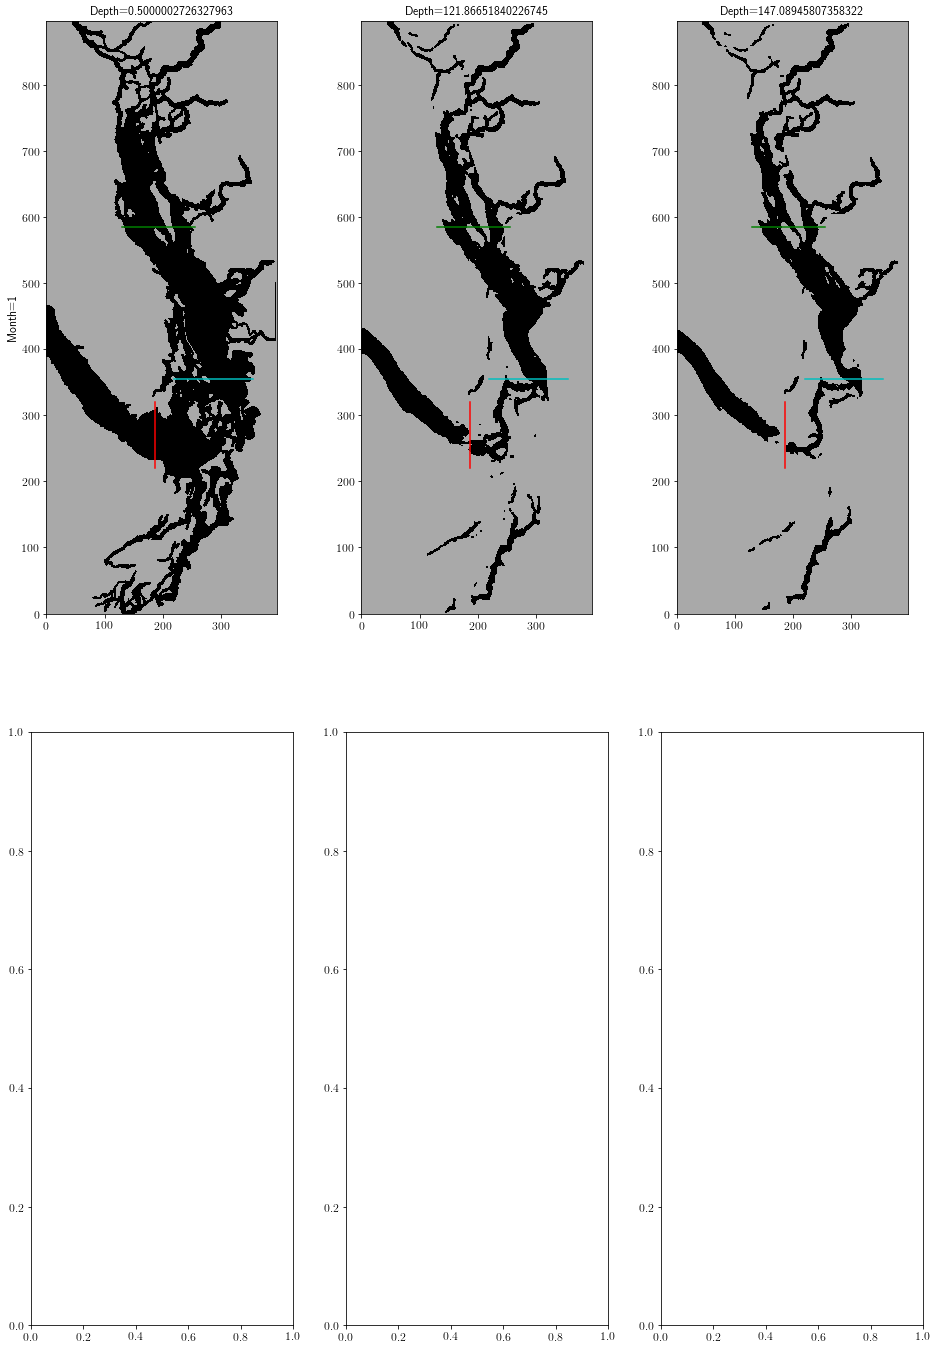

In [6]:
fig,ax=plt.subplots(2,3,figsize=(16,24))
#kk=30 #36,34,32,30
simin=40
simax=80
for mon in (1,):
    iax=ax[mon-1,0]
    kk=0
    iax.contourf(tmask[0,kk,:,:],levels=(0,.5,1.5),lw=.5,colors=('darkgray','k','k'))
    viz_tools.set_aspect(iax,coords='grid')
    iax.set_title('Depth='+str(gdept[kk]))
    iax.set_ylabel('Month='+str(mon))
    iax.plot((186,186),(220,320),'r-')
    iax.plot((220,355),(355,355),'c-')
    iax.plot((130,255),(585,585),'g-')
    
    iax=ax[mon-1,1]
    kk=27
    iax.contourf(tmask[0,kk,:,:],levels=(0,.5,1.5),lw=.5,colors=('darkgray','k','k'))
    viz_tools.set_aspect(iax,coords='grid')
    iax.set_title('Depth='+str(gdept[kk]))
    iax.plot((186,186),(220,320),'r-')
    iax.plot((220,355),(355,355),'c-')
    iax.plot((130,255),(585,585),'g-')
    
    iax=ax[mon-1,2]
    kk=28#33
    iax.contourf(tmask[0,kk,:,:],levels=(0,.5,1.5),lw=.5,colors=('darkgray','k','k'))
    viz_tools.set_aspect(iax,coords='grid')
    iax.set_title('Depth='+str(gdept[kk]))
    iax.plot((186,186),(220,320),'r-')
    iax.plot((220,355),(355,355),'c-')
    iax.plot((130,255),(585,585),'g-')